In [1]:
# загрузка библиотек для работы с данными
import pandas as pd
import re

#### Реестр лесных пожаров по Омской области 2015-2021 гг.

In [2]:
# загрузка данных
df_train = pd.read_excel('data/train.xls', header=3)
df_train.head()

,Обнаружение лесного пожара,Unnamed: 1,Ближайший населенный пункт,Unnamed: 3,"Географические координаты места обнаружения пожара, (широта и долгота), градусы, минуты, секунды",Unnamed: 5,"Скорость ветра в районе пожара, в момент обнару-жения, м/с","Площадь пожара, га",Unnamed: 8,Unnamed: 9,Unnamed: 10,Причины
0,дата,время,наименование,"азимут, гра-дусы",NaN,NaN,NaN,в момент обна­ ружения,нарастающим итогом с момента возникновения,NaN,NaN,возникновения пожара
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,всего,лесная,покрытая лесной раститель- ностью,NaN
2,1,2,3,4,5,NaN,6.0,7,8,9,10,11
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01.05.2015,00:00:00,д Могильно-Старожильск,280,"55°55'47,0""N","074°25'02,0""E",4.0,0.3,1.6,1.6,1.6,с иных категорий


In [3]:
# размерность данных
df_train.shape

(1975, 12)

In [4]:
# признаки данных
df_train.columns

Index(['Обнаружение лесного пожара', 'Unnamed: 1',
       'Ближайший населенный пункт', 'Unnamed: 3',
       'Географические координаты места обнаружения пожара, (широта и долгота), градусы, минуты, секунды',
       'Unnamed: 5',
       'Скорость ветра в районе пожара, в момент обнару-жения, м/с',
       'Площадь пожара, га     ', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Причины'],
      dtype='object')

In [5]:
# признаки данных
df_train.iloc[[0]].values

array([['дата', 'время', 'наименование', 'азимут, гра-дусы', nan, nan,
        nan, ' в момент обна\xad ружения',
        'нарастающим итогом с момента возникновения', nan, nan,
        'возникновения пожара']], dtype=object)

In [6]:
# признаки данных
df_train.iloc[[1]].values

array([[nan, nan, nan, nan, nan, nan, nan, nan, 'всего', 'лесная',
        'покрытая лесной раститель- ностью', nan]], dtype=object)

In [7]:
# переименование признаков
col_names = ['Обнаружение лесного пожара, дата', 'Обнаружение лесного пожара, время',
             'Географические координаты места обнаружения пожара, наименование', 'Географические координаты места обнаружения пожара, азимут, гра-дусы',
             'Широта (градусы, минуты, секунды)', 'Долгота (градусы, минуты, секунды)',
             'Скорость ветра в районе пожара, в момент обнару-жения, м/с', 'Площадь пожара, га (в момент обна­ ружения)', 'Площадь пожара, га (всего)',
             'Площадь пожара, га (лесная)', 'Площадь пожара, га (покрытая лесной раститель- ностью)', 'Причина']

In [8]:
# переименование признаков
df_train.columns = col_names

In [9]:
df_train.head()

,"Обнаружение лесного пожара, дата","Обнаружение лесного пожара, время","Географические координаты места обнаружения пожара, наименование","Географические координаты места обнаружения пожара, азимут, гра-дусы","Широта (градусы, минуты, секунды)","Долгота (градусы, минуты, секунды)","Скорость ветра в районе пожара, в момент обнару-жения, м/с","Площадь пожара, га (в момент обна­ ружения)","Площадь пожара, га (всего)","Площадь пожара, га (лесная)","Площадь пожара, га (покрытая лесной раститель- ностью)",Причина
0,дата,время,наименование,"азимут, гра-дусы",NaN,NaN,NaN,в момент обна­ ружения,нарастающим итогом с момента возникновения,NaN,NaN,возникновения пожара
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,всего,лесная,покрытая лесной раститель- ностью,NaN
2,1,2,3,4,5,NaN,6.0,7,8,9,10,11
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01.05.2015,00:00:00,д Могильно-Старожильск,280,"55°55'47,0""N","074°25'02,0""E",4.0,0.3,1.6,1.6,1.6,с иных категорий


In [10]:
# очистка данных
df_train_fire = df_train.iloc[4:].reset_index(drop=True)
df_train_fire.head()

,"Обнаружение лесного пожара, дата","Обнаружение лесного пожара, время","Географические координаты места обнаружения пожара, наименование","Географические координаты места обнаружения пожара, азимут, гра-дусы","Широта (градусы, минуты, секунды)","Долгота (градусы, минуты, секунды)","Скорость ветра в районе пожара, в момент обнару-жения, м/с","Площадь пожара, га (в момент обна­ ружения)","Площадь пожара, га (всего)","Площадь пожара, га (лесная)","Площадь пожара, га (покрытая лесной раститель- ностью)",Причина
0,01.05.2015,00:00:00,д Могильно-Старожильск,280,"55°55'47,0""N","074°25'02,0""E",4.0,0.3,1.6,1.6,1.6,с иных категорий
1,03.05.2015,11:00:00,д Решетниково,221,"56°17'49,0""N","074°40'18,0""E",3.0,1,8,8,8,с иных категорий
2,03.05.2015,00:00:00,д Осихино,300,"56°08'14,0""N","074°24'55,0""E",3.0,0.5,6,6,0,с иных категорий
3,04.05.2015,14:00:00,с Такмык,321,"56°16'26,0""N","074°38'46,0""E",2.0,0.3,1.1,1.1,1.1,с иных категорий
4,05.05.2015,11:00:00,д Осихино,132,"56°09'15,0""N","074°25'57,0""E",3.0,0.5,5,5,0,с иных категорий


In [11]:
# проверка наличия пропусков
(df_train_fire.isna().sum() / df_train_fire.shape[0] * 100).round(2).astype("str") + " %"

Обнаружение лесного пожара, дата                                         0.0 %
Обнаружение лесного пожара, время                                        0.0 %
Географические координаты места обнаружения пожара, наименование         0.2 %
Географические координаты места обнаружения пожара, азимут, гра-дусы    0.25 %
Широта (градусы, минуты, секунды)                                        0.0 %
Долгота (градусы, минуты, секунды)                                       0.0 %
Скорость ветра в районе пожара, в момент обнару-жения, м/с               3.5 %
Площадь пожара, га (в момент обна­ ружения)                              0.0 %
Площадь пожара, га (всего)                                               0.0 %
Площадь пожара, га (лесная)                                              0.0 %
Площадь пожара, га (покрытая лесной раститель- ностью)                   0.0 %
Причина                                                                  0.0 %
dtype: object

In [12]:
# вывод данных с пропусками
df_train_fire[df_train_fire["Географические координаты места обнаружения пожара, наименование"].isna()]

,"Обнаружение лесного пожара, дата","Обнаружение лесного пожара, время","Географические координаты места обнаружения пожара, наименование","Географические координаты места обнаружения пожара, азимут, гра-дусы","Широта (градусы, минуты, секунды)","Долгота (градусы, минуты, секунды)","Скорость ветра в районе пожара, в момент обнару-жения, м/с","Площадь пожара, га (в момент обна­ ружения)","Площадь пожара, га (всего)","Площадь пожара, га (лесная)","Площадь пожара, га (покрытая лесной раститель- ностью)",Причина
1232,12.09.2020,15:00:00,NaN,0,"55°07'34,0""N","073°36'07,0""E",0.0,0,11.5,10,1.5,мн
1233,13.09.2020,16:30:00,NaN,0,"55°33'40,0""N","074°09'35,0""E",6.0,4,8.6,8.6,6.1,мн
1287,15.09.2020,00:30:00,NaN,0,"55°39'36,0""N","073°34'19,0""E",5.0,0.7,1.4,1.4,1.4,мн
1319,12.09.2020,17:30:00,NaN,0,"54°35'48,0""N","073°00'09,0""E",0.0,0,16.4,16.4,16.4,мн


In [13]:
df_train_fire[df_train_fire["Географические координаты места обнаружения пожара, азимут, гра-дусы"].isna()]

,"Обнаружение лесного пожара, дата","Обнаружение лесного пожара, время","Географические координаты места обнаружения пожара, наименование","Географические координаты места обнаружения пожара, азимут, гра-дусы","Широта (градусы, минуты, секунды)","Долгота (градусы, минуты, секунды)","Скорость ветра в районе пожара, в момент обнару-жения, м/с","Площадь пожара, га (в момент обна­ ружения)","Площадь пожара, га (всего)","Площадь пожара, га (лесная)","Площадь пожара, га (покрытая лесной раститель- ностью)",Причина
292,12.05.2017,13:00:00,д Калиновка,NaN,"55°22'44,0""N","072°44'05,0""E",NaN,0.3,0.6,0.5,0.5,с иных категорий
293,14.05.2017,13:30:00,п Политотдел,NaN,"55°21'00,0""N","073°15'00,0""E",5.0,0.5,1,1,1,с иных категорий
294,14.05.2017,16:00:00,д Калиновка,NaN,"55°22'18,0""N","072°33'15,0""E",5.0,5,15.3,15.3,15.3,с иных категорий
401,03.05.2017,00:25:00,д Увальная Бития,NaN,"55°51'52,0""N","073°38'20,0""E",4.0,0.2,0.7,0.7,0.7,с иных категорий
591,21.05.2018,15:50:00,д Калачевка,NaN,"55°31'48,0""N","073°22'42,0""E",15.0,1.5,2.5,2.5,0,мн


**1 градус равен 60 минутам, в каждой из которых по 60 секунд**

In [14]:
# преобразование координат к единому формату
lat = """55°22'44,0"N"""
lon = """072°33'15,0"E"""

In [15]:
def parse_geo_point(text: str) -> str:

    raw = re.split('\D+', text)

    minuts = int(raw[1]) + int(raw[2]) / 60

    if len(raw[0]) == 2:
        grad = int(raw[0]) + minuts / 60
    else:
        grad = int(raw[0][1:]) + minuts / 60

    return grad

In [16]:
parse_geo_point(lat), parse_geo_point(lon)

(55.37888888888889, 72.55416666666666)

In [17]:
df_train_fire["Широта (градусы, минуты, секунды)"] = df_train_fire["Широта (градусы, минуты, секунды)"].apply(lambda x: parse_geo_point(x))
df_train_fire["Долгота (градусы, минуты, секунды)"] = df_train_fire["Долгота (градусы, минуты, секунды)"].apply(lambda x: parse_geo_point(x))

In [18]:
df_train_fire.head()

,"Обнаружение лесного пожара, дата","Обнаружение лесного пожара, время","Географические координаты места обнаружения пожара, наименование","Географические координаты места обнаружения пожара, азимут, гра-дусы","Широта (градусы, минуты, секунды)","Долгота (градусы, минуты, секунды)","Скорость ветра в районе пожара, в момент обнару-жения, м/с","Площадь пожара, га (в момент обна­ ружения)","Площадь пожара, га (всего)","Площадь пожара, га (лесная)","Площадь пожара, га (покрытая лесной раститель- ностью)",Причина
0,01.05.2015,00:00:00,д Могильно-Старожильск,280,55.929722,74.417222,4.0,0.3,1.6,1.6,1.6,с иных категорий
1,03.05.2015,11:00:00,д Решетниково,221,56.296944,74.671667,3.0,1,8,8,8,с иных категорий
2,03.05.2015,00:00:00,д Осихино,300,56.137222,74.415278,3.0,0.5,6,6,0,с иных категорий
3,04.05.2015,14:00:00,с Такмык,321,56.273889,74.646111,2.0,0.3,1.1,1.1,1.1,с иных категорий
4,05.05.2015,11:00:00,д Осихино,132,56.154167,74.432500,3.0,0.5,5,5,0,с иных категорий


In [19]:
# сохранение данных в файл
df_train_fire.to_csv("data/df_train_fire.csv", index=False)

In [20]:
# загрузка библиотек для работы с данными
import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np

#### 20 территорий космических снимков

In [21]:
#  вывод метаданных файла
def print_geotiff_info(path):
    try:
        # Открываем файл
        with rasterio.open(path) as src:
            # Основные метаданные
            print(f"File Path: {path}")
            print(f"Driver: {src.driver}")
            print(f"Width: {src.width}")
            print(f"Height: {src.height}")
            print(f"Count (Bands): {src.count}")
            print(f"CRS: {src.crs}")
            print(f"Transform: {src.transform}")
            print(f"Bounding Box: {src.bounds}")
            print(f"Datum: {src.dtypes}")

            # Информация по каждому каналу
            for i in range(1, src.count + 1):
                band = src.read(i)
                print(f"\nBand {i}:")
                print(f"  Data Type: {src.dtypes[i - 1]}")
                print(f"  Min Value: {band.min()}")
                print(f"  Max Value: {band.max()}")
                print(f"  Mean Value: {band.mean()}")
                print(f"  Standard Deviation: {band.std()}")

    except Exception as e:
        print(f'Error: {e}')

In [22]:
# визуализация изображения
def visualize_rgb_geotiff(file_path, r_band, g_band, b_band, ik_band, mask_band, photo_laer: str):
    try:
        with rasterio.open(file_path) as src:
            num_bands = src.count
            print(f"Number of bands: {num_bands}")
            red = src.read(r_band)  # B02 - Blue
            green = src.read(g_band)  # B03 - Green
            blue = src.read(b_band)  # B04 - Red
            ik = src.read(ik_band)
            mask = src.read(mask_band)

            if photo_laer == "full":
                photo = np.stack([red, green, blue], axis=-1)  # Отрисовка всего изображения
            elif photo_laer == "ik_laer":
                photo = np.stack([ik], axis=-1) # Отрисовка ИК-слоя изображения
            elif photo_laer == "mask_laer":
                photo = np.stack([mask], axis=-1)  # Отрисовка маски изображения
            photo = photo.astype(np.uint8)
            fig, ax = plt.subplots(figsize=(10, 10))
            ax.imshow(photo)
            ax.axis('off')
            plt.show()
    except Exception as e:
        print(f'Ошибка: {e}')

In [23]:
# путь к директории
directory = "data/train"

In [24]:
# получение списка файлов
tiff_files = []
csv_files = []

In [25]:
# получение путей к файлам
for root, dirs, files in os.walk(directory, topdown = False):
   for name in files:
        if name.split(".")[-1] == "tiff":
            tiff_files.append(os.path.join(root, name))
        elif name.split(".")[-1] == "csv":
            csv_files.append(os.path.join(root, name))

In [26]:
# проверка путей
len(tiff_files), len(csv_files)

(21, 21)

In [27]:
tiff_files[:3], csv_files[:3]

(['data/train/08/2021-06-08.tiff',
  'data/train/16/2020-05-09.tiff',
  'data/train/02/2021-06-03.tiff'],
 ['data/train/08/2021-06-08_weather.csv',
  'data/train/16/2020-05-09_weather.csv',
  'data/train/02/2021-06-03_weather.csv'])

In [28]:
# Вывод информации о GeoTIFF
print_geotiff_info(tiff_files[0])

File Path: data/train/08/2021-06-08.tiff
Driver: GTiff
Width: 258
Height: 172
Count (Bands): 5
CRS: EPSG:4326
Transform: | 10.00, 0.00, 74.39|
| 0.00,-10.00, 54.68|
| 0.00, 0.00, 1.00|
Bounding Box: BoundingBox(left=74.392537, bottom=-1665.317128, right=2654.392537, top=54.682872)
Datum: ('float32', 'float32', 'float32', 'float32', 'float32')

Band 1:
  Data Type: float32
  Min Value: 4.0
  Max Value: 26.0
  Mean Value: 14.166621208190918
  Standard Deviation: 4.838420391082764

Band 2:
  Data Type: float32
  Min Value: 9.0
  Max Value: 34.0
  Mean Value: 19.990827560424805
  Standard Deviation: 4.606518268585205

Band 3:
  Data Type: float32
  Min Value: 5.0
  Max Value: 45.0
  Mean Value: 21.40711212158203
  Standard Deviation: 8.826142311096191

Band 4:
  Data Type: float32
  Min Value: 30.0
  Max Value: 124.0
  Mean Value: 62.81505584716797
  Standard Deviation: 20.088781356811523

Band 5:
  Data Type: float32
  Min Value: 0.0
  Max Value: 1.0
  Mean Value: 0.13423922657966614
  St

In [29]:
with rasterio.open(tiff_files[0]) as src:

    width = src.width
    height = src.height
    transform = src.transform
    bounds = src.bounds


In [30]:
dataset = rasterio.open(tiff_files[0])

In [31]:
from pathlib import Path

In [32]:
Path(tiff_files[11]).stat()

os.stat_result(st_mode=33204, st_ino=13895934, st_dev=66309, st_nlink=1, st_uid=1000, st_gid=1000, st_size=1017550, st_atime=1725651805, st_mtime=1725630070, st_ctime=1725698647)

In [34]:
width, height

(258, 172)

In [35]:
bounds

BoundingBox(left=74.392537, bottom=-1665.317128, right=2654.392537, top=54.682872)

In [36]:
bounds.top, bounds.left

(54.682872, 74.392537)

In [37]:
transform * (0, 0)

(74.392537, 54.682872)

In [38]:
2654.392537 / 258, 1665.317128/ 172

(10.288343166666667, 9.682076325581395)

In [39]:
transform

Affine(10.0, 0.0, 74.392537,
       0.0, -10.0, 54.682872)

In [40]:
data_tiff = []

In [41]:
# сбор данных по файлам спутниковых снимков
for row in tiff_files:
    with rasterio.open(row) as src:

        width = src.width
        height = src.height
        transform = src.transform
        bounds = src.bounds
        band_count = src.count
        lat = bounds.top
        lon = bounds.left
        data_tiff.append((row, width, height, band_count, lat, lon))

In [42]:
df_tiff = pd.DataFrame(data_tiff, columns=["row", "width", "height", "band_count", "lat", "lon"])
df_tiff.head() 

,row,width,height,band_count,lat,lon
0,data/train/08/2021-06-08.tiff,258,172,5,54.682872,74.392537
1,data/train/16/2020-05-09.tiff,422,266,5,54.525540,73.054962
2,data/train/02/2021-06-03.tiff,361,223,5,56.887685,75.103989
3,data/train/19/2021-05-04.tiff,328,188,5,55.377940,73.323011
4,data/train/20/2021-05-15.tiff,521,342,5,55.142117,71.106906


In [43]:
df_tiff.describe().T

,count,mean,std,min,25%,50%,75%,max
width,21.0,459.238095,338.693800,135.00000,249.000000,381.000000,592.000000,1651.000000
height,21.0,329.904762,207.766673,106.00000,204.000000,257.000000,423.000000,992.000000
band_count,21.0,5.000000,0.000000,5.00000,5.000000,5.000000,5.000000,5.000000
lat,21.0,55.321477,0.758457,54.01957,54.827102,55.142117,55.772771,56.887685
lon,21.0,73.514888,1.470782,71.08223,72.984416,73.541962,75.008211,75.424231


In [44]:
df_tiff

,row,width,height,band_count,lat,lon
0,data/train/08/2021-06-08.tiff,258,172,5,54.682872,74.392537
1,data/train/16/2020-05-09.tiff,422,266,5,54.525540,73.054962
2,data/train/02/2021-06-03.tiff,361,223,5,56.887685,75.103989
3,data/train/19/2021-05-04.tiff,328,188,5,55.377940,73.323011
4,data/train/20/2021-05-15.tiff,521,342,5,55.142117,71.106906
5,data/train/09/2021-06-16.tiff,135,106,5,54.827102,73.610024
6,data/train/01/2021-05-26.tiff,191,137,5,55.772771,75.111109
7,data/train/14/2019-05-28.tiff,592,423,5,55.822603,72.984416
8,data/train/10/2021-06-16.tiff,381,257,5,55.105147,71.228990
9,data/train/04/2021-06-06.tiff,139,142,5,55.881097,71.816843


In [45]:
df_tiff.to_csv('data/df_tiff.csv', index=False)

In [47]:
with rasterio.open(tiff_files[0]) as src:
    num_bands = src.count
    red = src.read(1)  # B02 - Blue
    green = src.read(2)  # B03 - Green
    blue = src.read(3)  # B04 - Red
    ik = src.read(4)
    mask = src.read(5)

In [48]:
red.shape, green.shape, blue.shape, ik.shape, mask.shape

((172, 258), (172, 258), (172, 258), (172, 258), (172, 258))

Number of bands: 5


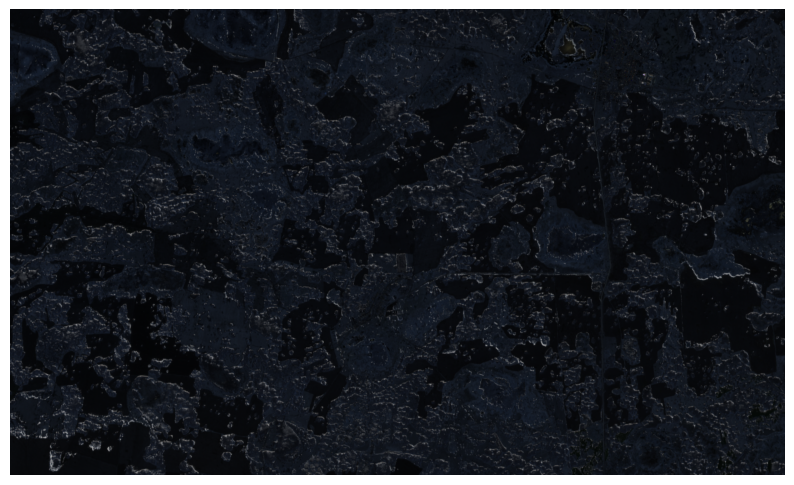

In [49]:
# Визуализация изображения
visualize_rgb_geotiff(tiff_files[-1], 1, 2, 3, 4, 5, "full")

Number of bands: 5


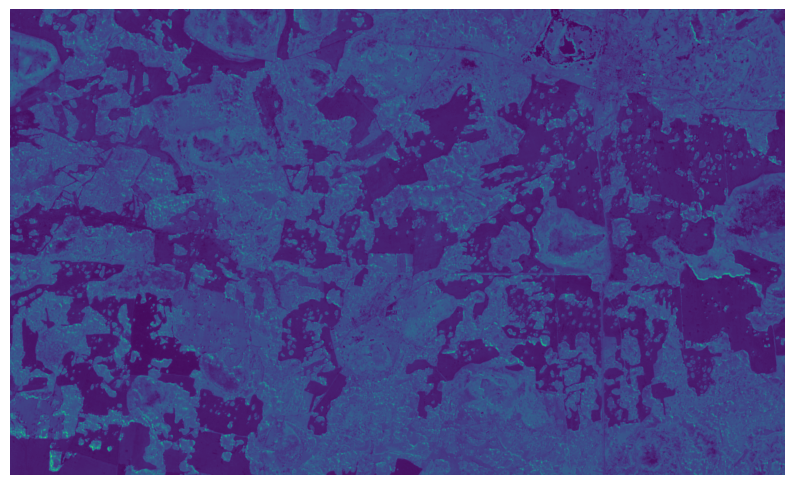

In [50]:
# Визуализация изображения
visualize_rgb_geotiff(tiff_files[-1], 1, 2, 3, 4, 5, "ik_laer")

Number of bands: 5


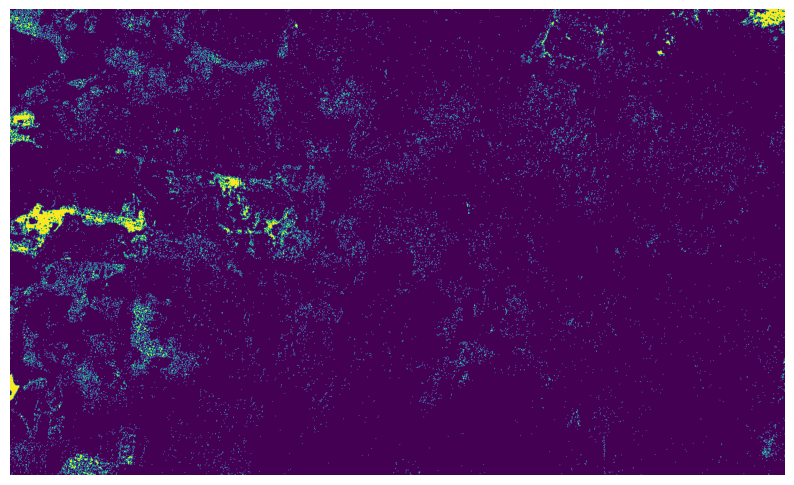

In [51]:
# Визуализация изображения
visualize_rgb_geotiff(tiff_files[-1], 1, 2, 3, 4, 5, "mask_laer")

#### Данные по метеоусловиям

In [53]:
csv_files[0]

'data/train/08/2021-06-08_weather.csv'

In [52]:
# метеоусловия
pd.read_csv(csv_files[0])

,time,Тсред,Тмин,Тмакс,Осадки всего,Направление ветра,Скорость ветра,Порывы ветра,Давление на уровне моря
0,2021-04-01,-5.4,-9.1,-1.6,0.0,208.0,19.7,NaN,1027.6
1,2021-04-02,-1.0,-4.0,1.4,1.1,220.0,21.8,NaN,1021.8
2,2021-04-03,0.5,-2.4,3.6,0.0,225.0,16.3,NaN,1023.5
3,2021-04-04,-0.3,-4.0,3.8,0.0,154.0,17.4,NaN,1019.0
4,2021-04-05,2.4,0.3,4.5,0.0,159.0,20.7,NaN,1007.8
...,...,...,...,...,...,...,...,...,...
57,2021-05-28,12.7,8.3,16.5,0.0,315.0,11.5,NaN,1021.2
58,2021-05-29,17.4,8.6,25.3,0.0,194.0,10.1,NaN,1019.6
59,2021-05-30,22.0,14.3,28.5,0.0,178.0,16.7,NaN,1015.4
60,2021-05-31,24.0,19.4,31.1,0.0,157.0,20.1,NaN,1006.6


In [54]:
# метеоусловия по всем файлам данных
list_weather_df = []

In [55]:
# считывание данных по метеоусловиям
for file in csv_files:
    current_df = pd.read_csv(file)
    current_df["file_path"] = file
    current_df = current_df.rename(columns={"Дата" : "time", "Атмосферное Давление" : "Давление на уровне моря"})
    list_weather_df.append(current_df)

In [56]:
len(list_weather_df)

21

In [57]:
# соединение данных
weather_df = pd.concat(list_weather_df)
weather_df.head()

,time,Тсред,Тмин,Тмакс,Осадки всего,Направление ветра,Скорость ветра,Порывы ветра,Давление на уровне моря,file_path
0,2021-04-01,-5.4,-9.1,-1.6,0.0,208.0,19.7,NaN,1027.6,data/train/08/2021-06-08_weather.csv
1,2021-04-02,-1.0,-4.0,1.4,1.1,220.0,21.8,NaN,1021.8,data/train/08/2021-06-08_weather.csv
2,2021-04-03,0.5,-2.4,3.6,0.0,225.0,16.3,NaN,1023.5,data/train/08/2021-06-08_weather.csv
3,2021-04-04,-0.3,-4.0,3.8,0.0,154.0,17.4,NaN,1019.0,data/train/08/2021-06-08_weather.csv
4,2021-04-05,2.4,0.3,4.5,0.0,159.0,20.7,NaN,1007.8,data/train/08/2021-06-08_weather.csv


In [58]:
# проверка наличия пропусков
(weather_df.isna().sum() / weather_df.shape[0] * 100).round(2).astype("str") + " %"

time                         0.0 %
Тсред                       2.08 %
Тмин                         6.1 %
Тмакс                       3.47 %
Осадки всего                7.64 %
Направление ветра          18.75 %
Скорость ветра             18.67 %
Порывы ветра               100.0 %
Давление на уровне моря    18.67 %
file_path                    0.0 %
dtype: object

In [60]:
#  признаки
weather_df.columns

Index(['time', 'Тсред', 'Тмин', 'Тмакс', 'Осадки всего', 'Направление ветра',
       'Скорость ветра', 'Порывы ветра', 'Давление на уровне моря',
       'file_path'],
      dtype='object')

In [61]:
# удаление 0 признаков
weather_df = weather_df.drop(["Порывы ветра"], axis=1)
weather_df.head()

,time,Тсред,Тмин,Тмакс,Осадки всего,Направление ветра,Скорость ветра,Давление на уровне моря,file_path
0,2021-04-01,-5.4,-9.1,-1.6,0.0,208.0,19.7,1027.6,data/train/08/2021-06-08_weather.csv
1,2021-04-02,-1.0,-4.0,1.4,1.1,220.0,21.8,1021.8,data/train/08/2021-06-08_weather.csv
2,2021-04-03,0.5,-2.4,3.6,0.0,225.0,16.3,1023.5,data/train/08/2021-06-08_weather.csv
3,2021-04-04,-0.3,-4.0,3.8,0.0,154.0,17.4,1019.0,data/train/08/2021-06-08_weather.csv
4,2021-04-05,2.4,0.3,4.5,0.0,159.0,20.7,1007.8,data/train/08/2021-06-08_weather.csv


In [62]:
weather_df.groupby("file_path")["time"].count()

file_path
data/train/00/2021-06-06_weather.csv    62
data/train/01/2021-05-26_weather.csv    62
data/train/02/2021-06-03_weather.csv    62
data/train/03/2021-06-03_weather.csv    62
data/train/04/2021-06-06_weather.csv    62
data/train/05/2021-06-03_weather.csv    62
data/train/06/2021-06-03_weather.csv    62
data/train/07/2021-06-03_weather.csv    62
data/train/08/2021-06-08_weather.csv    62
data/train/09/2021-06-16_weather.csv    62
data/train/10/2021-06-16_weather.csv    62
data/train/11/2018-06-01_weather.csv    60
data/train/12/2019-05-10_weather.csv    58
data/train/13/2019-05-17_weather.csv    62
data/train/14/2019-05-28_weather.csv    62
data/train/15/2020-05-02_weather.csv    62
data/train/16/2020-05-09_weather.csv    62
data/train/17/2020-05-31_weather.csv    62
data/train/18/2021-05-02_weather.csv    62
data/train/19/2021-05-04_weather.csv    62
data/train/20/2021-05-15_weather.csv    62
Name: time, dtype: int64

In [63]:
# сохранение данных в файл
weather_df.to_csv("data/weather_df.csv", index=False)